In [1]:
import sys
assert sys.version_info >= (3, 5)


import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
!pip install opendatasets
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/yasserh/loan-default-dataset")

Skipping, found downloaded files in "./loan-default-dataset" (use force=True to force download)


In [4]:
my_download= os.path.join("loan-default-dataset", "Loan_Default.csv")
my_dir = os.getcwd()

loans = pd.read_csv(os.path.join(my_dir,my_download))

In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [6]:
loans.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [7]:
correlations = loans.corr()

In [8]:
correlations

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
ID,1.000000,NaN,-0.000566,0.000442,0.002338,-0.005507,-0.004056,0.000990,0.002535,-0.001036,-0.005853,0.001703,-0.008132
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amount,-0.000566,NaN,1.000000,-0.150844,-0.377272,0.065556,0.174474,0.734249,0.456065,0.004438,0.038869,-0.036825,0.015029
rate_of_interest,0.000442,NaN,-0.150844,1.000000,0.614908,-0.076473,0.209330,-0.122613,-0.041809,-0.001331,-0.000220,0.022957,0.055124
Interest_rate_spread,0.002338,NaN,-0.377272,0.614908,1.000000,0.033037,-0.157139,-0.334571,-0.151333,-0.001738,0.040257,NaN,0.078178
Upfront_charges,-0.005507,NaN,0.065556,-0.076473,0.033037,1.000000,-0.054960,0.053043,0.016580,-0.001484,-0.031347,-0.019138,0.000115
term,-0.004056,NaN,0.174474,0.209330,-0.157139,-0.054960,1.000000,0.045117,-0.053785,-0.003149,0.106834,-0.000240,0.110572
property_value,0.000990,NaN,0.734249,-0.122613,-0.334571,0.053043,0.045117,1.000000,0.414883,0.002430,-0.215102,-0.048864,-0.056288
income,0.002535,NaN,0.456065,-0.041809,-0.151333,0.016580,-0.053785,0.414883,1.000000,0.000802,-0.066203,-0.065119,-0.267807
Credit_Score,-0.001036,NaN,0.004438,-0.001331,-0.001738,-0.001484,-0.003149,0.002430,0.000802,1.000000,-0.005533,0.004004,-0.000313


In [9]:
duplicates = loans[loans.duplicated(keep=False)]

In [10]:
duplicates

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1


In [11]:
loans.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [12]:
NAN_loans = loans[loans.isnull().any(axis=1)]

In [13]:
NAN_loans[['rate_of_interest','Status']]

,rate_of_interest,Status
0,NaN,1
1,NaN,1
3,4.250,0
7,4.125,0
10,NaN,1
...,...,...
148651,NaN,1
148652,NaN,1
148658,NaN,1
148661,NaN,1


In [14]:
loans['Status'].mean()

0.24644514696979888

In [15]:
loans.dropna(inplace=True)

In [16]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98187 entries, 2 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         98187 non-null  int64  
 1   year                       98187 non-null  int64  
 2   loan_limit                 98187 non-null  object 
 3   Gender                     98187 non-null  object 
 4   approv_in_adv              98187 non-null  object 
 5   loan_type                  98187 non-null  object 
 6   loan_purpose               98187 non-null  object 
 7   Credit_Worthiness          98187 non-null  object 
 8   open_credit                98187 non-null  object 
 9   business_or_commercial     98187 non-null  object 
 10  loan_amount                98187 non-null  int64  
 11  rate_of_interest           98187 non-null  float64
 12  Interest_rate_spread       98187 non-null  float64
 13  Upfront_charges            98187 non-null  fl

In [17]:
#cutting down the data set to just 1000 rows for quiker plotting
sample_loans = loans.sample(n=1000)

In [18]:
import seaborn as sns


<AxesSubplot:xlabel='Gender', ylabel='income'>

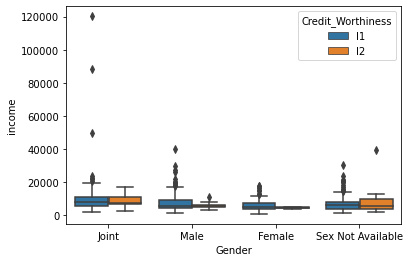

In [19]:
sns.boxplot(data=sample_loans,x='Gender' ,y='income', hue='Credit_Worthiness')

<AxesSubplot:xlabel='Gender', ylabel='income'>

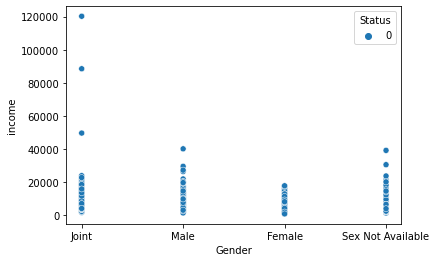

In [20]:
sns.scatterplot(data=sample_loans,x='Gender',y='income',hue='Status')

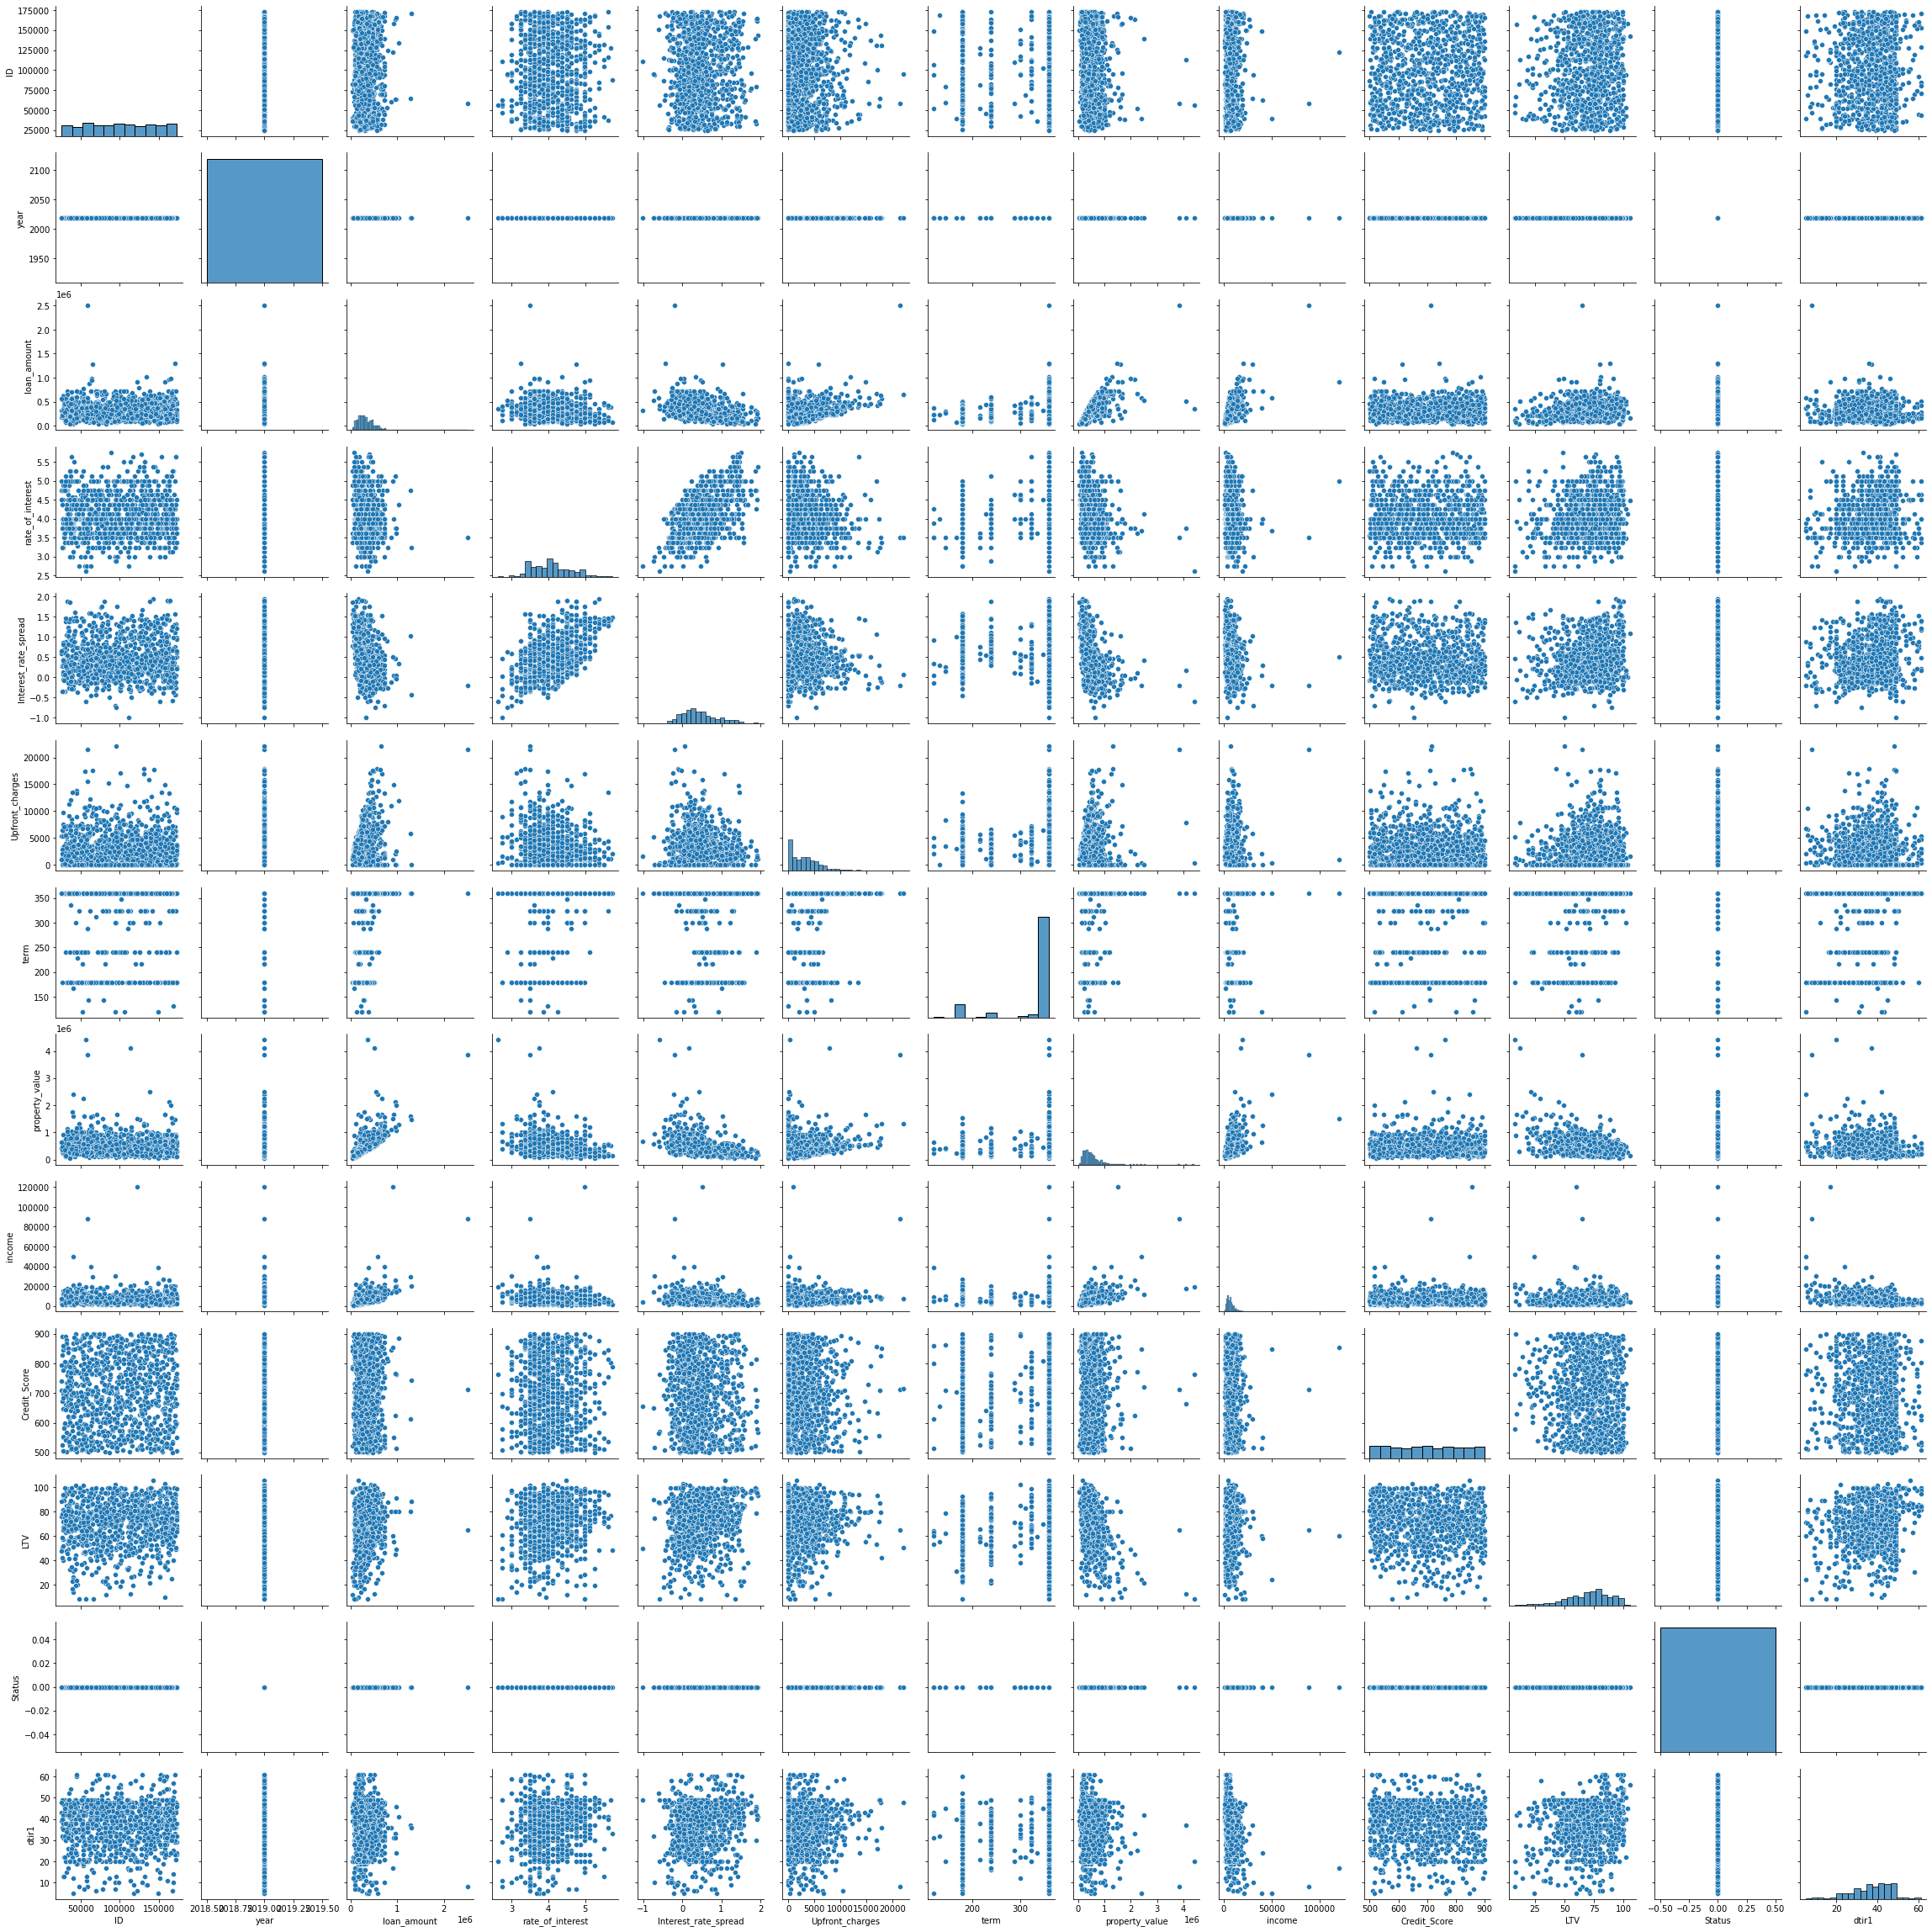

In [21]:
sns.pairplot(sample_loans)

array([[<AxesSubplot:xlabel='property_value', ylabel='property_value'>,
        <AxesSubplot:xlabel='rate_of_interest', ylabel='property_value'>,
        <AxesSubplot:xlabel='income', ylabel='property_value'>,
        <AxesSubplot:xlabel='term', ylabel='property_value'>],
       [<AxesSubplot:xlabel='property_value', ylabel='rate_of_interest'>,
        <AxesSubplot:xlabel='rate_of_interest', ylabel='rate_of_interest'>,
        <AxesSubplot:xlabel='income', ylabel='rate_of_interest'>,
        <AxesSubplot:xlabel='term', ylabel='rate_of_interest'>],
       [<AxesSubplot:xlabel='property_value', ylabel='income'>,
        <AxesSubplot:xlabel='rate_of_interest', ylabel='income'>,
        <AxesSubplot:xlabel='income', ylabel='income'>,
        <AxesSubplot:xlabel='term', ylabel='income'>],
       [<AxesSubplot:xlabel='property_value', ylabel='term'>,
        <AxesSubplot:xlabel='rate_of_interest', ylabel='term'>,
        <AxesSubplot:xlabel='income', ylabel='term'>,
        <AxesSubplot:xlab

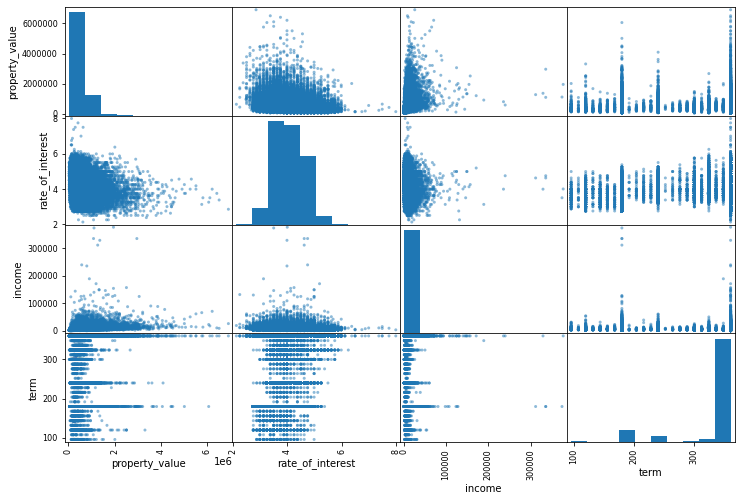

In [22]:
from pandas.plotting import scatter_matrix

attributes = ["property_value", "rate_of_interest", "income", "term"]
scatter_matrix(loans[attributes], figsize=(12, 8))

In [23]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98187 entries, 2 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         98187 non-null  int64  
 1   year                       98187 non-null  int64  
 2   loan_limit                 98187 non-null  object 
 3   Gender                     98187 non-null  object 
 4   approv_in_adv              98187 non-null  object 
 5   loan_type                  98187 non-null  object 
 6   loan_purpose               98187 non-null  object 
 7   Credit_Worthiness          98187 non-null  object 
 8   open_credit                98187 non-null  object 
 9   business_or_commercial     98187 non-null  object 
 10  loan_amount                98187 non-null  int64  
 11  rate_of_interest           98187 non-null  float64
 12  Interest_rate_spread       98187 non-null  float64
 13  Upfront_charges            98187 non-null  fl

In [24]:
loans['Status'].mean()

0.0

In [25]:
loans['Status'].mean()

0.0

In [26]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98187 entries, 2 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         98187 non-null  int64  
 1   year                       98187 non-null  int64  
 2   loan_limit                 98187 non-null  object 
 3   Gender                     98187 non-null  object 
 4   approv_in_adv              98187 non-null  object 
 5   loan_type                  98187 non-null  object 
 6   loan_purpose               98187 non-null  object 
 7   Credit_Worthiness          98187 non-null  object 
 8   open_credit                98187 non-null  object 
 9   business_or_commercial     98187 non-null  object 
 10  loan_amount                98187 non-null  int64  
 11  rate_of_interest           98187 non-null  float64
 12  Interest_rate_spread       98187 non-null  float64
 13  Upfront_charges            98187 non-null  fl

In [27]:
loans['Gender'].info

<bound method Series.info of 2                      Male
4                     Joint
5                     Joint
6                     Joint
8                     Joint
                ...        
148665    Sex Not Available
148666                 Male
148667                 Male
148668               Female
148669               Female
Name: Gender, Length: 98187, dtype: object>

In [28]:
from numpy import argmax
values = loans['Gender'].info

In [29]:
values

<bound method Series.info of 2                      Male
4                     Joint
5                     Joint
6                     Joint
8                     Joint
                ...        
148665    Sex Not Available
148666                 Male
148667                 Male
148668               Female
148669               Female
Name: Gender, Length: 98187, dtype: object>

In [30]:

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
onhot_encoder = OneHotEncoder()
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

NameError: name 'LabelEncoder' is not defined

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [32]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
onhot_encoder = OneHotEncoder()
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

ValueError: y should be a 1d array, got an array of shape () instead.

In [33]:
values = loans['Gender']

In [34]:
values[0]

2                      Male
4                     Joint
5                     Joint
6                     Joint
8                     Joint
                ...        
148665    Sex Not Available
148666                 Male
148667                 Male
148668               Female
148669               Female
Name: Gender, Length: 98187, dtype: object

In [35]:
values[0]

KeyError: 0

In [36]:
print(values)

2                      Male
4                     Joint
5                     Joint
6                     Joint
8                     Joint
                ...        
148665    Sex Not Available
148666                 Male
148667                 Male
148668               Female
148669               Female
Name: Gender, Length: 98187, dtype: object


In [37]:
print(values[,])

SyntaxError: invalid syntax (2085935827.py, line 1)

In [38]:
print(values[0])

KeyError: 0

In [39]:
values.values()

TypeError: 'numpy.ndarray' object is not callable

In [40]:
values

2                      Male
4                     Joint
5                     Joint
6                     Joint
8                     Joint
                ...        
148665    Sex Not Available
148666                 Male
148667                 Male
148668               Female
148669               Female
Name: Gender, Length: 98187, dtype: object

In [41]:
values.info

<bound method Series.info of 2                      Male
4                     Joint
5                     Joint
6                     Joint
8                     Joint
                ...        
148665    Sex Not Available
148666                 Male
148667                 Male
148668               Female
148669               Female
Name: Gender, Length: 98187, dtype: object>

In [42]:
loans['Gender'].values

array(['Male', 'Joint', 'Joint', ..., 'Male', 'Female', 'Female'],
      dtype=object)

In [43]:
values = loans['Gender'].values


In [44]:
values

array(['Male', 'Joint', 'Joint', ..., 'Male', 'Female', 'Female'],
      dtype=object)

In [45]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
onhot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

NameError: name 'onehot_encoder' is not defined

In [46]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
onhot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

NameError: name 'onehot_encoder' is not defined

In [47]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['Male']


In [48]:
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[1, :])])
print(inverted)

['Joint']


In [49]:
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[2, :])])
print(inverted)

['Joint']


In [50]:
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[4, :])])
print(inverted)

['Joint']


In [51]:
onehot_encoded

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [52]:
integer_encoded

array([[2],
       [1],
       [1],
       ...,
       [2],
       [0],
       [0]])

In [53]:
values

array(['Male', 'Joint', 'Joint', ..., 'Male', 'Female', 'Female'],
      dtype=object)

temploans = loans
print(loans)

In [54]:
temploans = loans

In [55]:
temploans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98187 entries, 2 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         98187 non-null  int64  
 1   year                       98187 non-null  int64  
 2   loan_limit                 98187 non-null  object 
 3   Gender                     98187 non-null  object 
 4   approv_in_adv              98187 non-null  object 
 5   loan_type                  98187 non-null  object 
 6   loan_purpose               98187 non-null  object 
 7   Credit_Worthiness          98187 non-null  object 
 8   open_credit                98187 non-null  object 
 9   business_or_commercial     98187 non-null  object 
 10  loan_amount                98187 non-null  int64  
 11  rate_of_interest           98187 non-null  float64
 12  Interest_rate_spread       98187 non-null  float64
 13  Upfront_charges            98187 non-null  fl

In [56]:
temploans['Gender'].values = onehot_encoded

AttributeError: can't set attribute

In [57]:
print(onehot_encoded)

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [58]:
print(integer_encoded)

[[2]
 [1]
 [1]
 ...
 [2]
 [0]
 [0]]


In [59]:
print(values)

['Male' 'Joint' 'Joint' ... 'Male' 'Female' 'Female']


In [60]:
loans.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [61]:
cat_columns = loans.columns

In [62]:
cat_columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [63]:
cat_columns[0]

'ID'

In [65]:
foreach i in cat_columns
print(cat_columns[i])

SyntaxError: invalid syntax (2368621784.py, line 1)

In [66]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['Male']


In [67]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
print(integer_encoded)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

[[2]
 [1]
 [1]
 ...
 [2]
 [0]
 [0]]
[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
['Male']
